<a href="https://colab.research.google.com/github/adi-dev-vikram/IoT_botnet_detection/blob/main/pcap_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scapy
from google.colab import files
from scapy.all import *
import matplotlib.pyplot as plt

from collections import Counter

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving suspicious.pcap to suspicious.pcap
User uploaded file "suspicious.pcap" with length 10429492 bytes


+-----------------+-------+
|        IP       | Count |
+-----------------+-------+
|  192.168.29.153 |  260  |
|   15.241.32.90  |   66  |
|  104.71.108.105 |   47  |
|   192.168.29.1  |   23  |
|  3.110.248.130  |   10  |
|  54.152.176.133 |   9   |
|   54.70.113.89  |   9   |
|  52.85.232.143  |   8   |
|   3.217.88.156  |   6   |
|  35.186.194.58  |   5   |
|   13.107.42.14  |   5   |
|  13.234.228.113 |   5   |
|   75.2.88.188   |   5   |
|  35.201.112.186 |   4   |
|  192.28.147.68  |   4   |
|  63.32.242.154  |   4   |
|  35.174.127.31  |   4   |
|  192.168.29.70  |   4   |
|  34.120.195.249 |   3   |
|  152.195.58.59  |   3   |
|   52.85.234.31  |   2   |
|   52.85.234.4   |   2   |
| 151.101.154.217 |   2   |
|  74.125.24.188  |   2   |
|   54.230.65.81  |   2   |
|   54.230.65.97  |   2   |
|  104.71.111.60  |   2   |
|  52.36.115.231  |   2   |
|  104.18.100.194 |   2   |
|   54.230.65.21  |   2   |
|  52.85.124.186  |   2   |
|  34.232.189.29  |   1   |
+-----------------+-

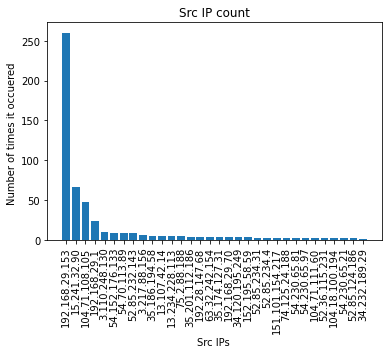

In [ ]:
from prettytable import PrettyTable
%matplotlib inline
def read_pcap():
  pcap_read = rdpcap('suspicious.pcap')
  for pkt in pcap_read:
    if pkt.haslayer(DNSQR):
        query = pkt[DNSQR].qname
        print(query)
    if pkt.haslayer(IP):
      pckt_src=pkt[IP].src
      pckt_dst=pkt[IP].dst
      pckt_ttl=pkt[IP].ttl
      print("IP Packet: {} is going to {} and has ttl value {}".format(pckt_src,pckt_dst,pckt_ttl))

def process_src_IP():
  packets = rdpcap('suspicious.pcap')
  srcIP=[]
  for pkt in packets:
    if IP in pkt:
      try:
        srcIP.append(pkt[IP].src)
        #print(srcIP)
      except:
        pass
  
  cnt=Counter()
  for ip in srcIP:
    cnt[ip] += 1
  xData=[]
  yData=[]
  for ip, count in cnt.most_common():
    xData.append(ip)
    yData.append(count)

  table= PrettyTable(["IP", "Count"])
  for ip, count in cnt.most_common():
    table.add_row([ip, count])
  print(table)
  plt.bar(xData,yData)
  plt.title("Src IP count")
  plt.xlabel("Src IPs ")
  plt.ylabel("Number of times it occuered ")
  #plt.setp(plt.get_xticklabels(), rotation=30, horizontalalignment='right')
  plt.xticks(xData, rotation='vertical')
  plt.show()

def main():
  #read_pcap()
  process_src_IP()



if __name__=='__main__':
  main()

#interface = "eth0"
#def print_packet(packet):
# ip_layer = packet.getlayer(IP)
# print("[!] New Packet: {src} -> {dst}".format(src=ip_layer.src,
#dst=ip_layer.dst))
#print("[*] Start sniffing...")
#sniff(iface=interface, filter="ip", prn=print_packet)
#print("[*] Stop sniffing")

In [ ]:
!pip install plotly